In [21]:
import pandas as pd
from dask import delayed
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [22]:
df=delayed(pd.read_excel('data/Dry_Bean_Dataset.xlsx', index_col='Bean ID')).compute()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13611 entries, 1 to 13611
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
Bean ID                                                                     
1        28395    610.291       208.178117       173.888747      1.197191   
2        28734    638.018       200.524796       182.734419      1.097356   
3        29380    624.110       212.826130       175.931143      1.209713   
4        30008    645.884       210.557999       182.516516      1.153638   
5        30140    620.134       201.847882       190.279279      1.060798   

         Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  \
Bean ID                                                                
1            0.549812       28715     190.141097  0.763923  0.988856   
2            0.411785       29172     191.272750  0.783968  0.984986   
3            0.562727       29690     193.410904  0.778113  0.989559   
4            0.498616       30724     195.467062  0.782681  0.976696   
5            0.333680       30417     195.896503  0.773098  0.990893   

         roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \
Bean ID                                                                     
1         0.958027     0.913358      0.007332      0.003147      0.834222   
2         0.887034     0.953861      0.006979      0.003564      0.909851   
3         0.947849     0.908774      0.007244      0.003048      0.825871   
4         0.903936     0.928329      0.007017      0.003215      0.861794   
5         0.984877     0.970516      0.006697      0.003665      0.941900   

         ShapeFactor4  Class  
Bean ID                       
1            0.998724  SEKER  
2            0.998430  SEKER  
3            0.999066  SEKER  
4            0.994199  SEKER  
5            0.999166  SEKER

In [23]:
temp = df.drop(columns=['Class'])

1. Произвести визуализацию точек из исходного признакового пространства в 2-мерном пространстве, используя алгоритм t-SNE (`sklearn.manifold.TSNE`). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [24]:
%%time
tsne = TSNE(n_components=2, n_iter=300, n_jobs=-1)
tsne_data = tsne.fit_transform(temp)

CPU times: user 1min 59s, sys: 3.5 s, total: 2min 3s
Wall time: 8.85 s


<AxesSubplot:title={'center':'TSNE'}>

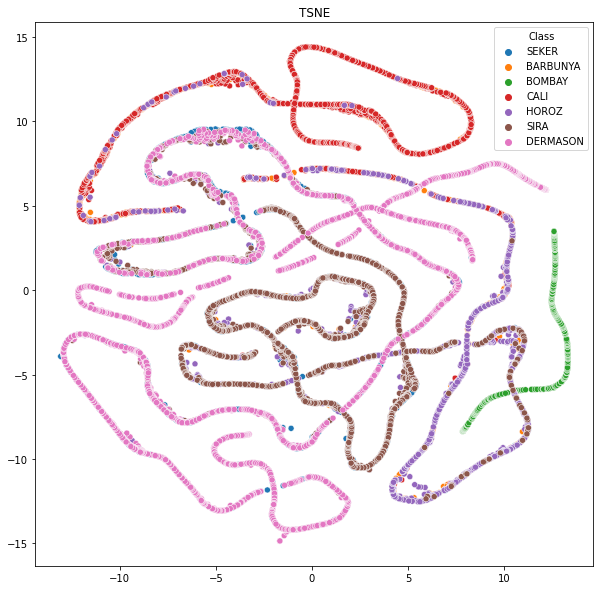

In [25]:
plt.figure(figsize=(10,10))
plt.title("TSNE")
sns.scatterplot(x=tsne_data[:,0],y=tsne_data[:,1],hue=df['Class'])

2. Произвести визуализацию точек из исходного признакового пространства в 2-мерном пространстве, используя метод главных компонент (`sklearn.decomposition.PCA`) или Truncated SVD (`sklearn.decomposition.TruncatedSVD`). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [26]:
%%time
pca = PCA(n_components=2)
pca_data = pca.fit_transform(temp)

CPU times: user 90.2 ms, sys: 8.08 ms, total: 98.3 ms
Wall time: 14.3 ms


<AxesSubplot:title={'center':'PCA'}>

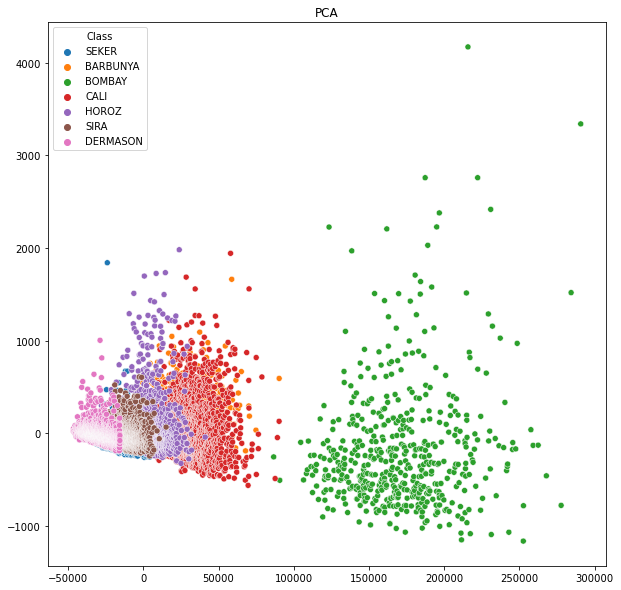

In [27]:
plt.figure(figsize=(10,10))
plt.title("PCA")
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=df['Class'])

In [28]:
%%time
tsvd = TruncatedSVD(n_components=2,n_iter=1000)
tsvd_data = tsvd.fit_transform(temp)

CPU times: user 11.2 s, sys: 307 ms, total: 11.5 s
Wall time: 1.44 s


<AxesSubplot:title={'center':'TruncatedSVD'}>

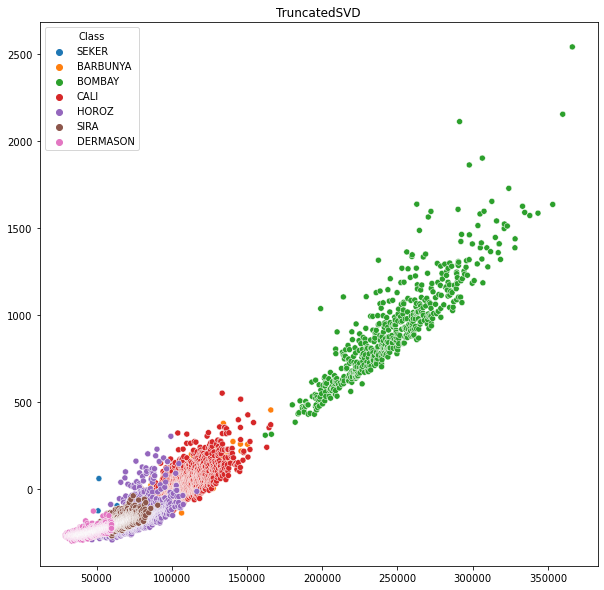

In [29]:
plt.figure(figsize=(10,10))
plt.title("TruncatedSVD")
sns.scatterplot(x=tsvd_data[:,0],y=tsvd_data[:,1],hue=df['Class'])

3. На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии исходных данных. Чтобы оценить необходимое количество компонент, постройте график *Number of components* / *Total explained variance*. Пример построения есть в статье от ODS.

In [30]:
components_ratio = PCA().fit(temp).explained_variance_ratio_*100

In [31]:
components_ratio.shape

(16,)

Text(0, 0.5, 'Explained variance ratio')

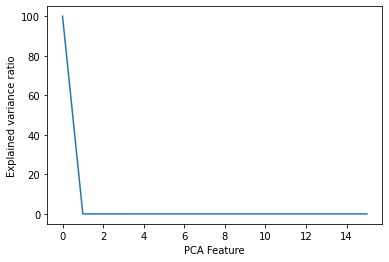

In [32]:
plt.plot(range(components_ratio.size), components_ratio)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance ratio')

Text(0, 0.5, 'Total explained variance ratio')

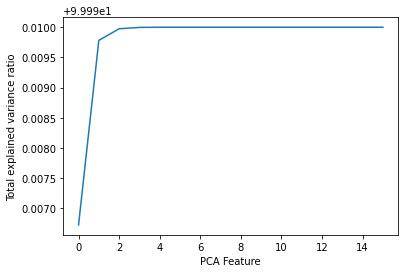

In [36]:
plt.plot(range(components_ratio.size), np.cumsum(components_ratio))
plt.xlabel('PCA Feature')
plt.ylabel('Total explained variance ratio')

4. Возьмите модель машинного обучения из любой предыдущей работы (главное, чтобы в ней было минимум несколько вещественных признаков), либо постройте новую. Сравните метрики качества исходной модели и другой модели, где вещественные признаки предварительно прошли через процедуру снижения размерности. Напишите выводы.  

In [37]:
estimator = RandomForestClassifier()
scaler = StandardScaler()

In [38]:
features = df.drop(columns=['Class'])
target = df.Class
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.5, random_state=13)

# Scaler$\rightarrow$KNN

In [39]:
%%time
basic_pipe = make_pipeline(scaler, estimator)
basic_pipe.fit(X_train, y_train)
pred = basic_pipe.predict(X_test)
print(f"score on train: {basic_pipe.score(X_train, y_train)}")
print(f"score on test: {basic_pipe.score(X_test, y_test)}")

score on train: 0.9997060984570169
score on test: 0.9228621804290332
CPU times: user 2.07 s, sys: 3.87 ms, total: 2.08 s
Wall time: 2.08 s


# Scaler$\rightarrow$PCA(2)$\rightarrow$KNN

In [40]:
%%time
pipe = make_pipeline(scaler, PCA(n_components=2), estimator)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(f"score on train: {pipe.score(X_train, y_train)}")
print(f"score on test: {pipe.score(X_test, y_test)}")

score on train: 1.0
score on test: 0.8516015280634734
CPU times: user 1.5 s, sys: 44 ms, total: 1.55 s
Wall time: 932 ms


# Scaler$\rightarrow$PCA(4)$\rightarrow$KNN

In [41]:
%%time
pipe = make_pipeline(scaler, PCA(n_components=4), estimator)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(f"score on train: {pipe.score(X_train, y_train)}")
print(f"score on test: {pipe.score(X_test, y_test)}")

score on train: 1.0
score on test: 0.8918601234205114
CPU times: user 1.89 s, sys: 31.5 ms, total: 1.92 s
Wall time: 1.31 s


# Scaler$\rightarrow$PCA(6)$\rightarrow$KNN

In [42]:
%%time
pipe = make_pipeline(scaler, PCA(n_components=6), estimator)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(f"score on train: {pipe.score(X_train, y_train)}")
print(f"score on test: {pipe.score(X_test, y_test)}")

score on train: 1.0
score on test: 0.925213047311196
CPU times: user 1.98 s, sys: 44.1 ms, total: 2.03 s
Wall time: 1.35 s


<AxesSubplot:>

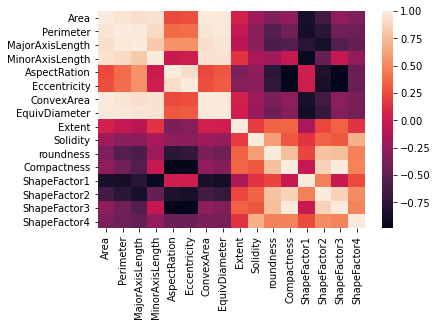

In [43]:
sns.heatmap(temp.corr())

Хотя мы и оставляем более 90% дисперсии исходных данных при 2 и 4 компонентах score на контрольной выборке меньше нежели если мы бы обучались на всем признаковом пространстве. Однако при 6 главных компонентах нам удается иметь примерно такой же score как и на всем признаковом пространстве. Возможно это связано с тем что метод PCA может выделять только линейные зависимости. Попробуем провести один эксперемент с методом декомпозиции T-SNE.

In [52]:
%%time
temp_scaler = scaler.fit_transform(features)
tsne = TSNE(n_components=2,perplexity=20, learning_rate=100, n_jobs=-1).fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=13)

CPU times: user 5min 52s, sys: 10.5 s, total: 6min 3s
Wall time: 24.6 s


In [53]:
%%time
estimator.fit(X_train, y_train)

CPU times: user 2.06 s, sys: 0 ns, total: 2.06 s
Wall time: 1.91 s


RandomForestClassifier()

In [54]:
print(f"score on train: {estimator.score(X_train, y_train)}")
print(f"score on test: {estimator.score(X_test, y_test)}")

score on train: 0.9998530492285085
score on test: 0.9222744637084925


Результат на уровне PCA(6)